The aim of this code is performing EDA of this HINTS data. Particularly we are interested in exploring the relationship between the elderly population and a couple other variables such as health seeking behaviour, internet usage, health app usage etc. some of the methods here are based on this article: https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14

The following section involves importing the data and cleaning it up

In [2]:
import datetime
import json
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the data file and take a look at the data
local_folder = '.'
df = pd.read_sas(os.path.join(local_folder, 'hints5_cycle3_public.sas7bdat'),encoding='mac_roman')

In [4]:
list(df.columns); #list all the columns in the data

In [5]:
# define dataframes that segment the population into the young and elderly
# the elderly are determined to be those who are 65 years of age and older; everyone else falls under the category of "young"
yng = df.loc[df['Age'] < 65,:]
eld = df.loc[df['Age'] >= 65,:]


We still need to conduct some data cleaning that includes thinking about weights, dealing with invalid data etc

# The following section contains some univariate analysis

In [6]:
eld.groupby(["Age"]).count();

In [7]:
#bar graph of normalized age
eld.Age.value_counts(normalize=True)

65.0    0.076492
70.0    0.070882
72.0    0.069352
68.0    0.068332
66.0    0.063743
67.0    0.062723
69.0    0.049465
71.0    0.047935
76.0    0.046915
73.0    0.045895
74.0    0.042325
77.0    0.041305
75.0    0.040796
78.0    0.038246
82.0    0.027537
79.0    0.025497
80.0    0.023967
81.0    0.023967
84.0    0.018868
86.0    0.017338
87.0    0.016318
85.0    0.015298
83.0    0.014788
88.0    0.013259
89.0    0.008669
92.0    0.008159
90.0    0.006629
91.0    0.005099
93.0    0.004080
94.0    0.002550
97.0    0.001530
98.0    0.001020
95.0    0.001020
Name: Age, dtype: float64

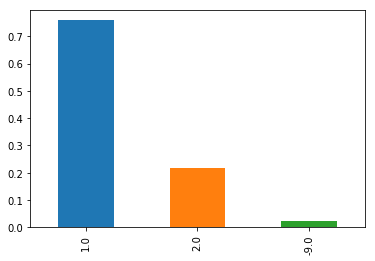

In [8]:
#plot of health seeking amongs elderly
eld.SeekHealthInfo.value_counts(normalize=True).plot.bar()
plt.show()

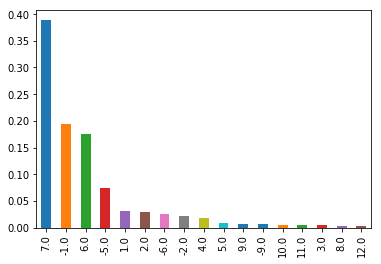

In [9]:
#plot of where people sought health info first last time they searched, 7 is internet, 6 is doctor or healthcare provider
eld.WhereSeekHealthInfo.value_counts(normalize=True).plot.bar()
plt.show()

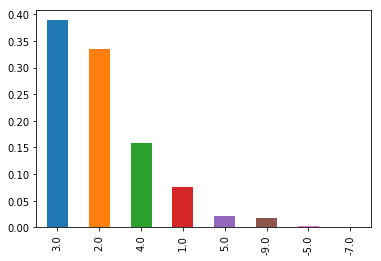

In [10]:
#plot of self reported health 1= excellent
eld.GeneralHealth.value_counts(normalize=True).plot.bar()
plt.show()

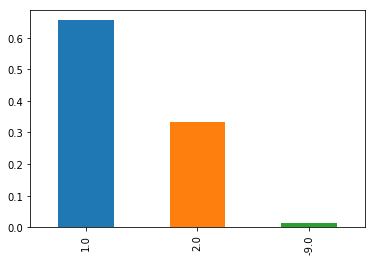

In [11]:
#plot of general internet usage among elderly
eld.UseInternet.value_counts(normalize=True).plot.bar()
plt.show()

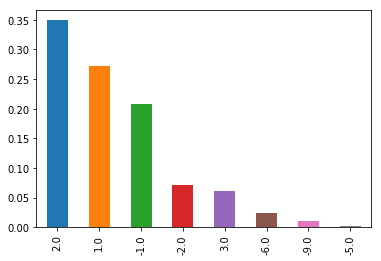

In [12]:
#plot showing health apps availability on tablets/smartphones
eld.TabletHealthWellnessApps.value_counts(normalize=True).plot.bar()
plt.show()

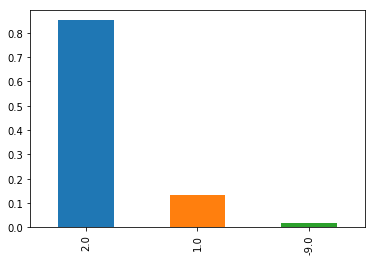

In [13]:
eld.WearableDevTrackHealth.value_counts(normalize=True).plot.bar()
plt.show()

# The next section contains some bivariate analysis

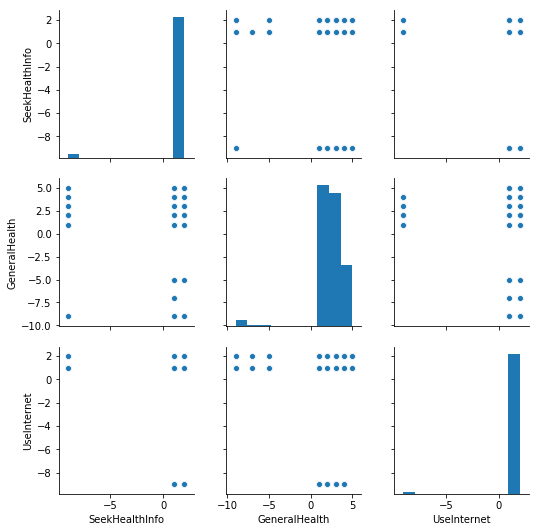

In [14]:
#pair plot of age, generalhealth and health seeking behaviour 
sns.pairplot(data = eld, vars=['SeekHealthInfo','GeneralHealth', 'UseInternet'])
plt.show()

In [15]:
# Creating a correlation matrix
eld[['SeekHealthInfo','GeneralHealth','UseInternet','TabletHealthWellnessApps']].corr()

,SeekHealthInfo,GeneralHealth,UseInternet,TabletHealthWellnessApps
SeekHealthInfo,1.000000,0.038056,0.003444,-0.024571
GeneralHealth,0.038056,1.000000,0.012094,0.034888
UseInternet,0.003444,0.012094,1.000000,0.207384
TabletHealthWellnessApps,-0.024571,0.034888,0.207384,1.000000


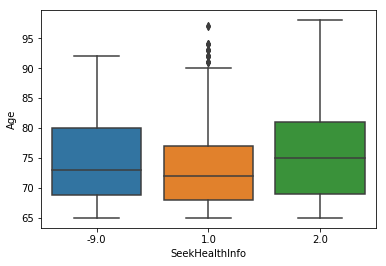

In [16]:
#box plot of health seeking behaviour and age
sns.boxplot(eld.SeekHealthInfo, eld.Age)
plt.show()

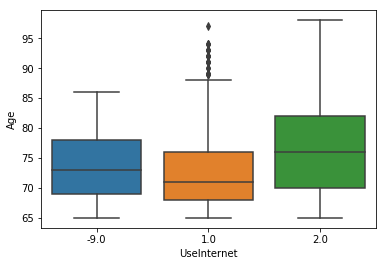

In [17]:
#box plot of Internet Usage and age
sns.boxplot(eld.UseInternet,eld.Age )
plt.show()

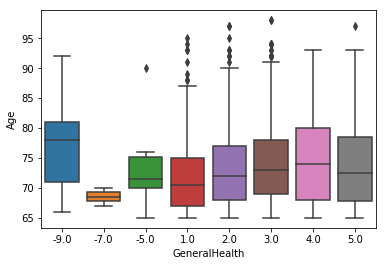

In [18]:
#box plot of general health and age
sns.boxplot(eld.GeneralHealth, eld.Age)
plt.show()

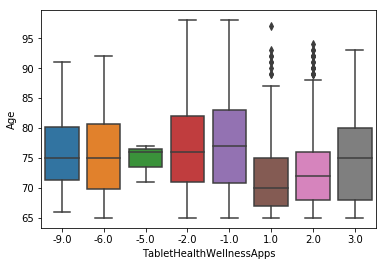

In [19]:
#box plot of Tablet health wellness App and age
sns.boxplot(eld.TabletHealthWellnessApps, eld.Age)
plt.show()

In [20]:
#pivot table
piv_tbl = pd.pivot_table(data=eld, index='Age', columns='TabletHealthWellnessApps',values='GeneralHealth')
print(piv_tbl)

#create heat map of education vs marital vs response_rate
#sns.heatmap(piv_tbl, annot=True, cmap = 'RdYlGn', center=0.117)

TabletHealthWellnessApps  -9.0      -6.0  -5.0      -2.0      -1.0       1.0  \
Age                                                                            
65.0                       NaN  3.000000   NaN  3.000000  2.875000  2.169492   
66.0                       2.5  2.000000   NaN  3.000000  2.285714  2.132075   
67.0                       NaN  3.500000   NaN  3.166667  1.411765  2.452381   
68.0                       3.0  1.000000   NaN  3.000000  3.105263  2.146341   
69.0                       4.0  2.400000   NaN  2.666667  2.866667  2.184211   
70.0                       3.0  2.000000   NaN  3.400000  1.904762  2.024390   
71.0                       3.0  2.500000   2.0  1.666667  1.714286  2.400000   
72.0                       3.0  2.000000   NaN  2.400000  2.800000  2.600000   
73.0                       NaN  3.000000   NaN  3.100000  2.000000  2.153846   
74.0                       2.5  2.333333   NaN  2.500000  2.888889  1.826087   
75.0                       3.0  3.666667

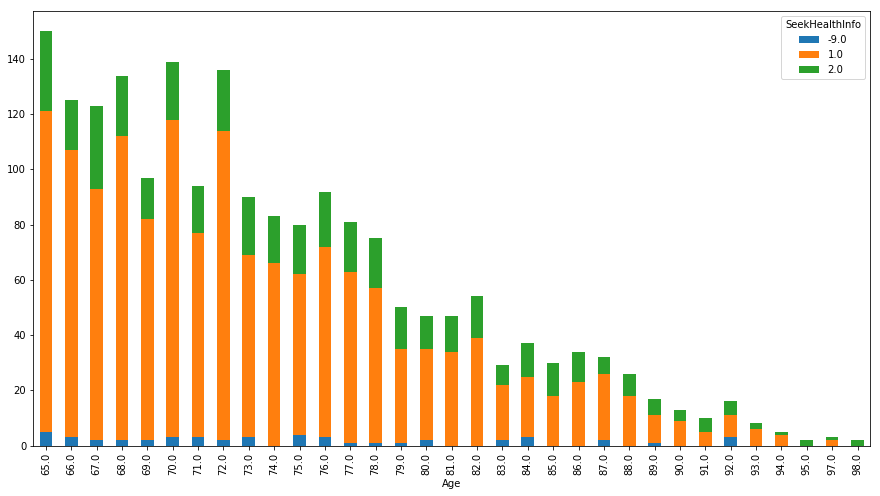

In [21]:
l= eld.groupby(["Age","SeekHealthInfo"])["PersonID"].count().reset_index()
l.set_index(['Age',"SeekHealthInfo", ]).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))

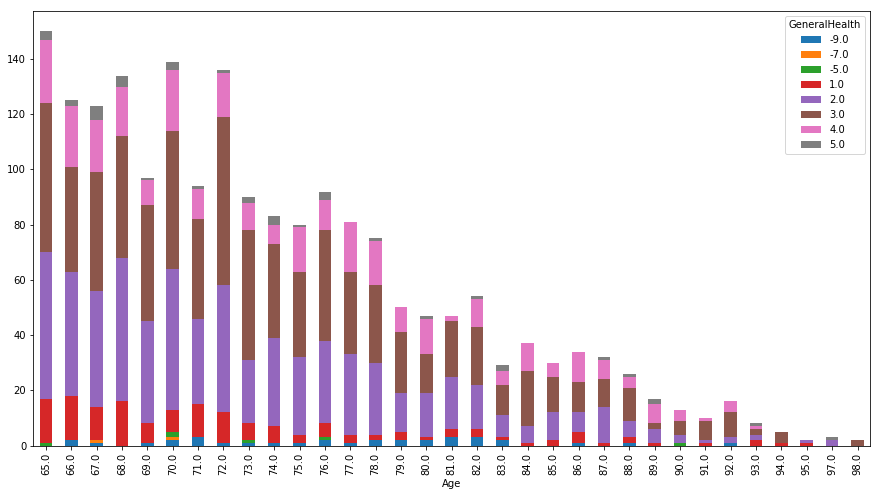

In [22]:
m= eld.groupby(["Age", 'GeneralHealth'])["PersonID"].count().reset_index()
m.set_index([ "Age",'GeneralHealth']).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))

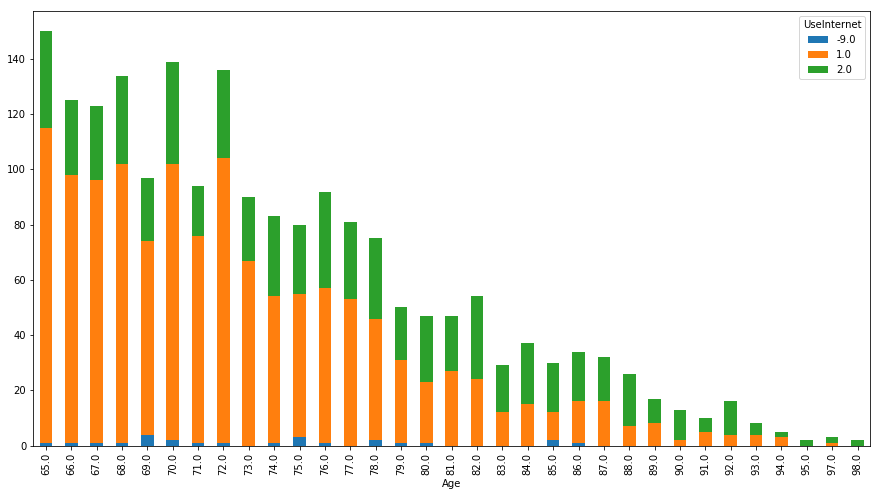

In [23]:
n= eld.groupby(["Age", 'UseInternet'])["PersonID"].count().reset_index()
n.set_index([ "Age",'UseInternet']).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))

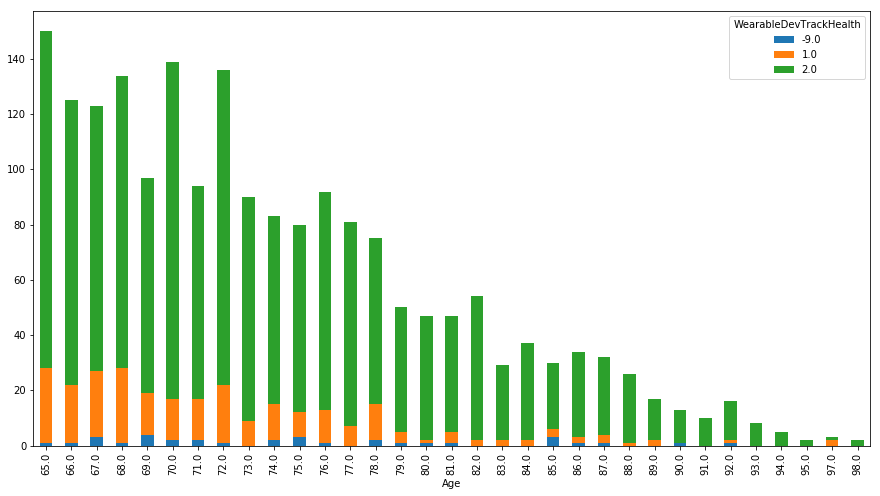

In [24]:
o= eld.groupby(["Age", 'WearableDevTrackHealth'])["PersonID"].count().reset_index()
o.set_index([ "Age",'WearableDevTrackHealth']).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))

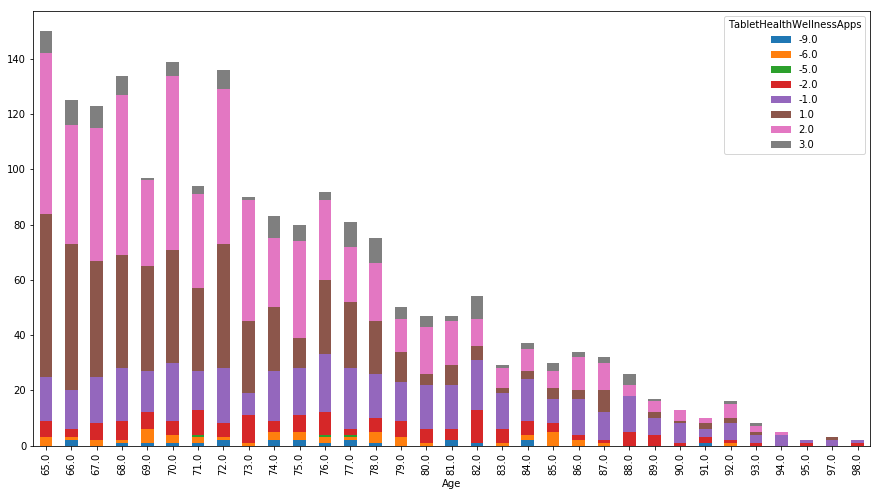

In [25]:
p= eld.groupby(["Age", 'TabletHealthWellnessApps'])["PersonID"].count().reset_index()
p.set_index([ "Age",'TabletHealthWellnessApps']).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))

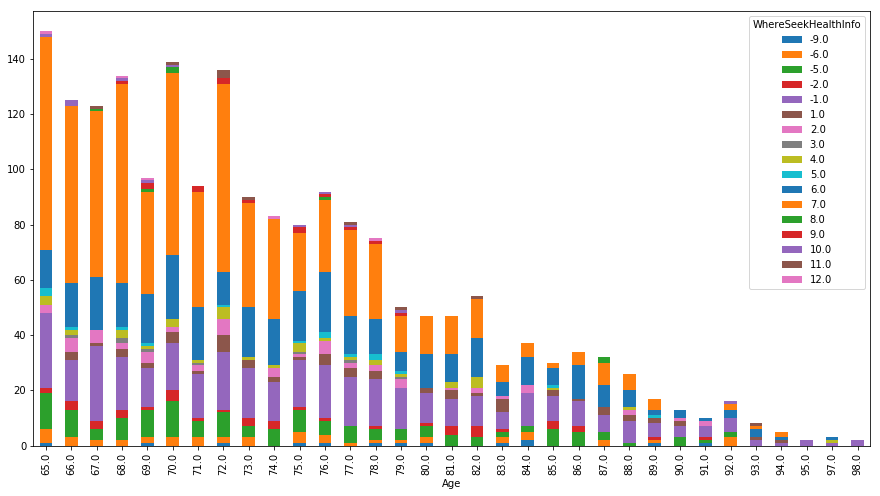

In [26]:
q= eld.groupby(["Age", 'WhereSeekHealthInfo'])["PersonID"].count().reset_index()
q.set_index([ "Age",'WhereSeekHealthInfo']).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))

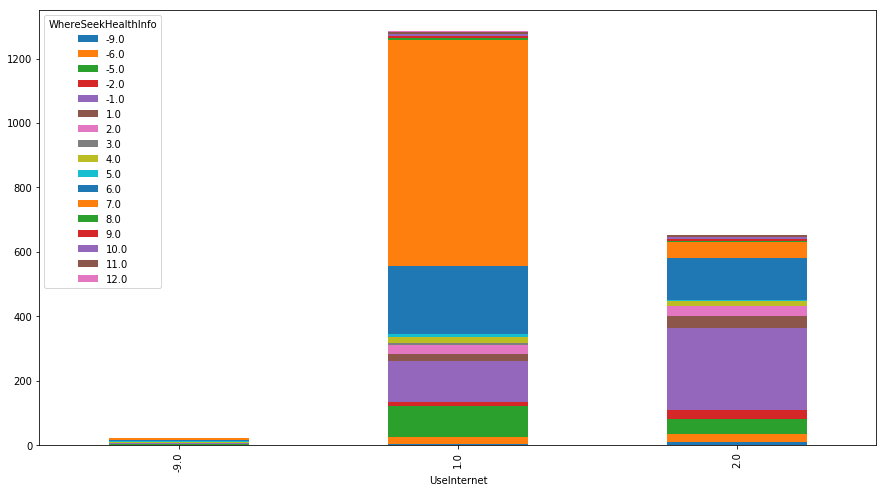

In [27]:
r= eld.groupby(["UseInternet", 'WhereSeekHealthInfo'])["PersonID"].count().reset_index()
r.set_index([ "UseInternet",'WhereSeekHealthInfo']).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))

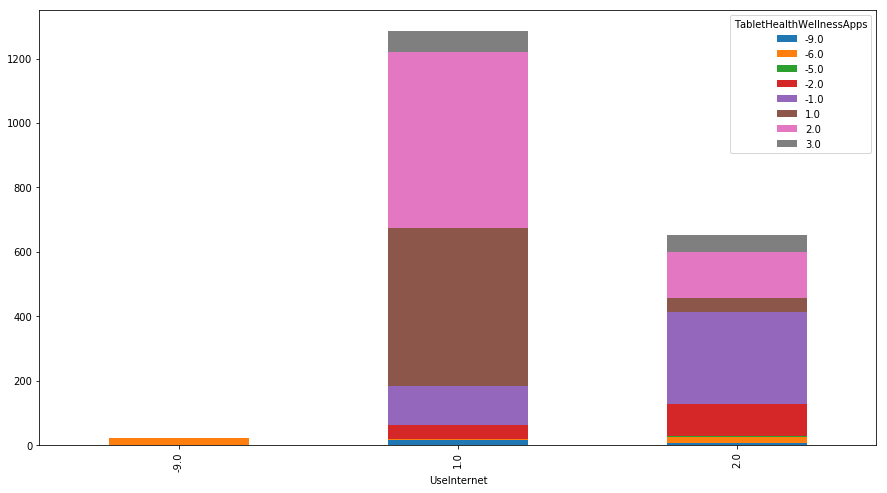

In [28]:
s= eld.groupby(["UseInternet", 'TabletHealthWellnessApps'])["PersonID"].count().reset_index()
s.set_index([ "UseInternet",'TabletHealthWellnessApps']).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))